In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

In [2]:
df =pd.read_csv('loangrant.csv')

C:\Users\Iqra\AppData\Local\Temp\ipykernel_15056\2930077557.py:1: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv('loangrant.csv')


In [3]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [4]:
df.shape

(111107, 19)

In [5]:
mv=df.isnull().sum()
print(mv)


Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      228
Tax Liens                          11
dtype: int64


In [6]:
#df.drop(columns=["Months since last delinquent", "Years in current job", "Annual Income"], inplace=True)
df['Credit Score'].fillna(df['Credit Score'].mean(), inplace=True)
df['Years in current job'].fillna(df['Years in current job'].mode()[0], inplace=True)
df['Months since last delinquent'].fillna(df['Months since last delinquent'].mode()[0], inplace=True)
df['Annual Income'].fillna(df['Annual Income'].median(), inplace=True)
df['Bankruptcies'].fillna(df['Bankruptcies'].mean(), inplace=True)
df['Tax Liens'].fillna(df['Tax Liens'].mean(), inplace=True)
mv=df.isnull().sum()
print(mv)

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64


In [7]:
# Get the data types of each column
data_types = df.dtypes

# Print the data types
print(data_types)

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                    float64
Years in current job             object
Home Ownership                   object
Annual Income                   float64
Purpose                          object
Monthly Debt                     object
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit              object
Bankruptcies                    float64
Tax Liens                       float64
dtype: object


In [26]:
columns_to_delete = ['Loan Status', 'Bankruptcies']  # List of column names to delete
df = df.drop(columns=columns_to_delete)

# Display the DataFrame after deleting columns
print("\nAfter deleting columns:")
print(df)


After deleting columns:
                                     Loan ID  \
0       6cf51492-02a2-423e-b93d-676f05b9ad53   
1       552e7ade-4292-4354-9ff9-c48031697d72   
2       9b5e32b3-8d76-4801-afc8-d729d5a2e6b9   
3       5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe   
4       1450910f-9495-4fc9-afaf-9bdf4b9821df   
...                                      ...   
111102  503f01e2-c3c4-4b10-886e-f15de57b6f1a   
111103  8af53bc0-56a4-4801-a960-52a46a90b33f   
111104  96efd327-f965-42ae-8b2b-d2555205ce19   
111105  ec19166c-70c5-4d49-adb6-fb3fc15024a2   
111106  f83ae0e1-bd30-46c7-9f72-f4f9fe2f36ca   

                                 Customer ID  Current Loan Amount        Term  \
0       7c202b37-2add-44e8-9aea-d5b119aea935                12232  Short Term   
1       e7217b0a-07ac-47dd-b379-577b5a35b7c6                25014   Long Term   
2       0a62fc41-16c8-40b5-92ff-9e4b763ce714                16117  Short Term   
3       30f36c59-5182-4482-8bbb-5b736849ae43                11716  Short T

In [27]:
df.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,12.0,14,0,35706,77961,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,12.0,21,0,7009,43533,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,0.0


In [28]:
binary_mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to the column
df['Loan ID'] = df['Loan ID'].map(binary_mapping).fillna(0).astype(int)
df.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens
0,0,7c202b37-2add-44e8-9aea-d5b119aea935,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0
1,0,e7217b0a-07ac-47dd-b379-577b5a35b7c6,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,12.0,14,0,35706,77961,0.0
2,0,0a62fc41-16c8-40b5-92ff-9e4b763ce714,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,0.0
3,0,30f36c59-5182-4482-8bbb-5b736849ae43,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,12.0,21,0,7009,43533,0.0
4,0,70c26012-bba5-42c0-8dcb-75295ada31bb,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,0.0


In [29]:
binary_mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to the column
df['Customer ID']=df['Customer ID'].map(binary_mapping).fillna(0).astype(int)
df.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens
0,0,0,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0
1,0,0,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,12.0,14,0,35706,77961,0.0
2,0,0,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,0.0
3,0,0,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,12.0,21,0,7009,43533,0.0
4,0,0,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,0.0


In [30]:
binary_mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to the column
df['Term']=df['Term'].map(binary_mapping).fillna(0).astype(int)
df.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens
0,0,0,12232,0,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0
1,0,0,25014,0,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,12.0,14,0,35706,77961,0.0
2,0,0,16117,0,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,0.0
3,0,0,11716,0,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,12.0,21,0,7009,43533,0.0
4,0,0,9789,0,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,0.0


In [31]:
binary_mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to the column
df['Years in current job']=df['Years in current job'].map(binary_mapping).fillna(0).astype(int)
df.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens
0,0,0,12232,0,7280.0,0,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0
1,0,0,25014,0,7330.0,0,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,12.0,14,0,35706,77961,0.0
2,0,0,16117,0,7240.0,0,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,0.0
3,0,0,11716,0,7400.0,0,Rent,34171.0,Debt Consolidation,990.94,10.0,12.0,21,0,7009,43533,0.0
4,0,0,9789,0,6860.0,0,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,0.0


In [32]:
binary_mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to the column
df['Home Ownership']=df['Home Ownership'].map(binary_mapping).fillna(0).astype(int)
df.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens
0,0,0,12232,0,7280.0,0,0,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0
1,0,0,25014,0,7330.0,0,0,81099.0,Debt Consolidation,892.09,26.7,12.0,14,0,35706,77961,0.0
2,0,0,16117,0,7240.0,0,0,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,0.0
3,0,0,11716,0,7400.0,0,0,34171.0,Debt Consolidation,990.94,10.0,12.0,21,0,7009,43533,0.0
4,0,0,9789,0,6860.0,0,0,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,0.0


In [33]:
binary_mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to the column
df['Purpose']=df['Purpose'].map(binary_mapping).fillna(0).astype(int)
df.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens
0,0,0,12232,0,7280.0,0,0,46643.0,0,777.39,18.0,10.0,12,0,6762,7946,0.0
1,0,0,25014,0,7330.0,0,0,81099.0,0,892.09,26.7,12.0,14,0,35706,77961,0.0
2,0,0,16117,0,7240.0,0,0,60438.0,0,1244.02,16.7,32.0,11,1,11275,14815,0.0
3,0,0,11716,0,7400.0,0,0,34171.0,0,990.94,10.0,12.0,21,0,7009,43533,0.0
4,0,0,9789,0,6860.0,0,0,47003.0,0,503.71,16.7,25.0,13,1,16913,19553,0.0


In [34]:
binary_mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to the column
df['Monthly Debt']=df['Monthly Debt'].map(binary_mapping).fillna(0).astype(int)
df.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens
0,0,0,12232,0,7280.0,0,0,46643.0,0,0,18.0,10.0,12,0,6762,7946,0.0
1,0,0,25014,0,7330.0,0,0,81099.0,0,0,26.7,12.0,14,0,35706,77961,0.0
2,0,0,16117,0,7240.0,0,0,60438.0,0,0,16.7,32.0,11,1,11275,14815,0.0
3,0,0,11716,0,7400.0,0,0,34171.0,0,0,10.0,12.0,21,0,7009,43533,0.0
4,0,0,9789,0,6860.0,0,0,47003.0,0,0,16.7,25.0,13,1,16913,19553,0.0


In [35]:
binary_mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to the column
df['Maximum Open Credit']=df['Maximum Open Credit'].map(binary_mapping).fillna(0).astype(int)
df.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens
0,0,0,12232,0,7280.0,0,0,46643.0,0,0,18.0,10.0,12,0,6762,0,0.0
1,0,0,25014,0,7330.0,0,0,81099.0,0,0,26.7,12.0,14,0,35706,0,0.0
2,0,0,16117,0,7240.0,0,0,60438.0,0,0,16.7,32.0,11,1,11275,0,0.0
3,0,0,11716,0,7400.0,0,0,34171.0,0,0,10.0,12.0,21,0,7009,0,0.0
4,0,0,9789,0,6860.0,0,0,47003.0,0,0,16.7,25.0,13,1,16913,0,0.0


In [36]:
# Get the data types of each column
data_types = df.dtypes

# Print the data types
print(data_types)

Loan ID                           int32
Customer ID                       int32
Current Loan Amount               int64
Term                              int32
Credit Score                    float64
Years in current job              int32
Home Ownership                    int32
Annual Income                   float64
Purpose                           int32
Monthly Debt                      int32
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit               int32
Tax Liens                       float64
dtype: object


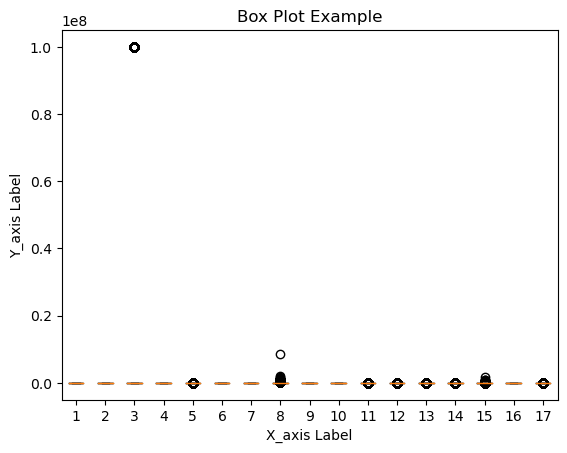

In [37]:
# Create a box plot
plt.boxplot(df)

# Add title and labels
plt.title('Box Plot Example')
plt.xlabel('X_axis Label')
plt.ylabel('Y_axis Label')

# Show the plot
plt.show()

In [38]:
# Define a function to identify and remove outliers
def remove_outliers(df, threshold=0.5):
    q1 = np.percentile(df, 25)
    q3 = np.percentile(df, 75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    return df[(df >= lower_bound) & (df <= upper_bound)]


# Remove outliers
cleaned_data = remove_outliers(df)

print("Original Data:", df)
print("Cleaned Data:", cleaned_data)


Original Data:         Loan ID  Customer ID  Current Loan Amount  Term  Credit Score  \
0             0            0                12232     0        7280.0   
1             0            0                25014     0        7330.0   
2             0            0                16117     0        7240.0   
3             0            0                11716     0        7400.0   
4             0            0                 9789     0        6860.0   
...         ...          ...                  ...   ...           ...   
111102        0            0                15654     0         686.0   
111103        0            0                15237     0         706.0   
111104        0            0                10413     0         719.0   
111105        0            0                34447     0         626.0   
111106        0            0                 9209     0         708.0   

        Years in current job  Home Ownership  Annual Income  Purpose  \
0                          0        

In [39]:
cleaned_data.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens
0,0,0,NaN,0,NaN,0,0,NaN,0,0,18.0,10.0,12.0,0,NaN,0,0.0
1,0,0,NaN,0,NaN,0,0,NaN,0,0,26.7,12.0,14.0,0,NaN,0,0.0
2,0,0,NaN,0,NaN,0,0,NaN,0,0,16.7,32.0,11.0,1,NaN,0,0.0
3,0,0,NaN,0,NaN,0,0,NaN,0,0,10.0,12.0,21.0,0,NaN,0,0.0
4,0,0,NaN,0,NaN,0,0,NaN,0,0,16.7,25.0,13.0,1,NaN,0,0.0


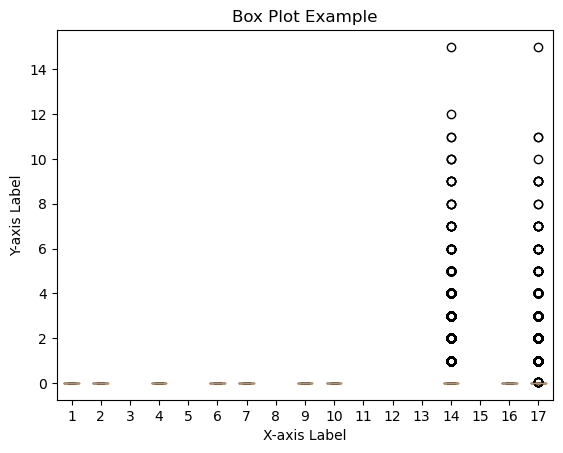

In [40]:
# Create a box plot
plt.boxplot(cleaned_data)

# Add title and labels
plt.title('Box Plot Example')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Show the plot
plt.show()

In [41]:
# Select the columns you want to standardize (numeric columns)
# For example, if you want to standardize columns 'A' and 'B':
columns_to_standardize = ['Years of Credit History', 'Current Loan Amount','Annual Income','Current Credit Balance']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

In [42]:
df.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens
0,0,0,-0.359911,0,7280.0,0,0,-0.471376,0,0,-0.028655,10.0,12,0,-0.439994,0,0.0
1,0,0,-0.359510,0,7330.0,0,0,0.211579,0,0,1.211639,12.0,14,0,1.020271,0,0.0
2,0,0,-0.359789,0,7240.0,0,0,-0.197944,0,0,-0.213987,32.0,11,1,-0.212306,0,0.0
3,0,0,-0.359927,0,7400.0,0,0,-0.718584,0,0,-1.169156,12.0,21,0,-0.427532,0,0.0
4,0,0,-0.359988,0,6860.0,0,0,-0.464240,0,0,-0.213987,25.0,13,1,0.072138,0,0.0


In [43]:
categorical_columns = ['Monthly Debt']

# Apply one-hot encoding
data_encoded = pd.get_dummies(df, columns=categorical_columns)
#print(data_encoded)

In [44]:
data_encoded.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens,Monthly Debt_0
0,0,0,-0.359911,0,7280.0,0,0,-0.471376,0,-0.028655,10.0,12,0,-0.439994,0,0.0,1
1,0,0,-0.359510,0,7330.0,0,0,0.211579,0,1.211639,12.0,14,0,1.020271,0,0.0,1
2,0,0,-0.359789,0,7240.0,0,0,-0.197944,0,-0.213987,32.0,11,1,-0.212306,0,0.0,1
3,0,0,-0.359927,0,7400.0,0,0,-0.718584,0,-1.169156,12.0,21,0,-0.427532,0,0.0,1
4,0,0,-0.359988,0,6860.0,0,0,-0.464240,0,-0.213987,25.0,13,1,0.072138,0,0.0,1


In [46]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Color' column
df['Credit Score'] = label_encoder.fit_transform(df['Credit Score'])

print(df)
print(label_encoder)

        Loan ID  Customer ID  Current Loan Amount  Term  Credit Score  \
0             0            0            -0.359911     0           303   
1             0            0            -0.359510     0           308   
2             0            0            -0.359789     0           299   
3             0            0            -0.359927     0           315   
4             0            0            -0.359988     0           261   
...         ...          ...                  ...   ...           ...   
111102        0            0            -0.359804     0           101   
111103        0            0            -0.359817     0           121   
111104        0            0            -0.359968     0           134   
111105        0            0            -0.359214     0            41   
111106        0            0            -0.360006     0           123   

        Years in current job  Home Ownership  Annual Income  Purpose  \
0                          0               0      -

In [49]:
!pip install category_encoders
import pandas as pd
import category_encoders as ce

# Create a BinaryEncoder
binary_encoder = ce.BinaryEncoder(cols=['Tax Liens'])

# Fit and transform the 'Color' column
df_binary_encoded = binary_encoder.fit_transform(df['Tax Liens'])

# Concatenate the original DataFrame with the binary-encoded columns
df = pd.concat([df, df_binary_encoded], axis=1)

print(df)

     -------------------------------------- 81.9/81.9 kB 572.9 kB/s eta 0:00:00
        Loan ID  Customer ID  Current Loan Amount  Term  Credit Score  \
0             0            0            -0.359911     0           303   
1             0            0            -0.359510     0           308   
2             0            0            -0.359789     0           299   
3             0            0            -0.359927     0           315   
4             0            0            -0.359988     0           261   
...         ...          ...                  ...   ...           ...   
111102        0            0            -0.359804     0           101   
111103        0            0            -0.359817     0           121   
111104        0            0            -0.359968     0           134   
111105        0            0            -0.359214     0            41   
111106        0            0            -0.360006     0           123   

        Years in current job  Home Ownershi

In [55]:
import pandas as pd
import category_encoders as ce

# Sample data with a categorical column 'Category' and a target variable 'Target'
data = {'Months since last delinquent': ['10.0', '12.0', '32.0', '12.0', '25.0'],
        'Target': [1, 0, 1, 1, 0]}
df = pd.DataFrame(data)

# Create a TargetEncoder
target_encoder = ce.TargetEncoder(cols=['Months since last delinquent'])

# Fit and transform the 'Category' column based on the 'Target' variable
df_target_encoded = target_encoder.fit_transform(df['Months since last delinquent'], df['Target'])

# Concatenate the original DataFrame with the target-encoded column
df = pd.concat([df, df_target_encoded], axis=1)

print(df)

   Months since last delinquent  Target  Months since last delinquent
0                          10.0       1                      0.652043
1                          12.0       0                      0.585815
2                          32.0       1                      0.652043
3                          12.0       1                      0.585815
4                          25.0       0                      0.521935
